<a href="https://colab.research.google.com/github/devamsheth0806/BellaBeats-case-study/blob/master/Case_Study_BellaBeats_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursera: Google Professional Certificate

## Google Data Analytics Capstone

Case Study: How Can a Wellness Technology Company Play It Smart?

Bellabeat is a wellness company specialized in health-focused smart products for women, using technology to track health and habits since 2013. Expanding rapidly, Bellabeat emphasizes digital marketing and data analysis to understand consumer trends and inform strategies. CEO of the company seeks to leverage user data from their products to guide future marketing approaches and continue the company's growth.

This notebook follows the case study and analyzes the data based on the given requirements following all the steps of professional data analytics.


### 1. Requirements

Identify the trends in usage of smart technologies by consumers for health monirtoring as well as how can Bellabeat manage their way to reach their customers.

### 2. Dataset

Source of the Dataset: https://zenodo.org/records/53894#.X9oeh3Uzaao

Data is fetched from Kaggle, and stored in Google drive for its access to Google Colab.

CC0 certified: Public Domain, dataset made available through Mobius

This data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.
Data is splitted into different CSV(Comma-Seperated Values) files containing data related to specific activities carried out by various consumers.

Time period of dataset: 03.12.2016 - 05.12.2016

Analyzing tracked activities of users helps identifying the way they are utilizing the smart devices and managing their health. It helps identifying how can Bellabeat reach upto market's expectations.

### 3. Tools

Tools used for Analysis are as follows:  
1. Jupyter Notebook - Development environment
2. Python - programming language and code runtime environment
3. Pandas - Python library to read data and work with it in the form of DataFrame
4. Numpy - Python library to support complaex and large mathematical calculations
5. Matplotlib - Python library to plot graphs

### 4. Dataset Preparation
As all data is present in different csv files and have their corresponding schema, we need to rea them into different dataframes.  
First, clean column names.  
Check for duplicate rows and remove one copy, if they exist.  
Check for null values and fill them rolling mean

Check Sample size and check if we have any significant difference.



In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing Datasets

In [ ]:
dailyActivity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
dailyActivity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [ ]:
dailyCalories = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
dailyCalories

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863
...,...,...,...
935,8877689391,5/8/2016,2847
936,8877689391,5/9/2016,3710
937,8877689391,5/10/2016,2832
938,8877689391,5/11/2016,3832


In [ ]:
dailyIntensities = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
dailyIntensities

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.00,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.00,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.00,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.00,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.00,5.04,0.41,2.71
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,1174,245,4,17,0.00,6.80,0.20,1.08
936,8877689391,5/9/2016,1131,217,19,73,0.05,6.24,0.80,11.10
937,8877689391,5/10/2016,1187,224,11,18,0.00,6.28,0.46,1.35
938,8877689391,5/11/2016,1127,213,12,88,0.00,5.89,0.41,13.22


In [ ]:
dailySteps = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
dailySteps

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669
...,...,...,...
935,8877689391,5/8/2016,10686
936,8877689391,5/9/2016,20226
937,8877689391,5/10/2016,10733
938,8877689391,5/11/2016,21420


In [ ]:
sleepDay = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
sleepDay

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [ ]:
weightLog = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')
weightLog

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


#### Process Phase

##### Daily Activity

In [ ]:
# Summary
dailyActivity.columns = dailyActivity.columns.str.strip()
print(dailyActivity.dtypes)
print("\nSummary of Data: ")
dailyActivity.describe()

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

Summary of Data: 


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [ ]:
# Change Object column to signify Date instead of an abstract Object
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'], format="%m/%d/%Y")

In [ ]:
# check duplicates
duplicateCount = sum(dailyActivity.duplicated(keep=False))
duplicateCount

0

In [ ]:
# check Null or NaN
dailyActivity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

##### Daily Calories

In [ ]:
# Summary
dailyCalories.columns = dailyCalories.columns.str.strip()
print(dailyCalories.dtypes)
print("\nSummary of Data: ")
dailyCalories.describe()

Id              int64
ActivityDay    object
Calories        int64
dtype: object

Summary of Data: 


,Id,Calories
count,9.400000e+02,940.000000
mean,4.855407e+09,2303.609574
std,2.424805e+09,718.166862
min,1.503960e+09,0.000000
25%,2.320127e+09,1828.500000
50%,4.445115e+09,2134.000000
75%,6.962181e+09,2793.250000
max,8.877689e+09,4900.000000


In [ ]:
# Change Object column to signify Date instead of an abstract Object
dailyCalories['ActivityDay'] = pd.to_datetime(dailyCalories['ActivityDay'], format="%m/%d/%Y")

In [ ]:
# check duplicates
duplicateCount = sum(dailyCalories.duplicated(keep=False))
duplicateCount

0

In [ ]:
# check Null or NaN
dailyCalories.isnull().sum()

Id             0
ActivityDay    0
Calories       0
dtype: int64

##### Daily Intensities

In [ ]:
# Summary
dailyIntensities.columns = dailyIntensities.columns.str.strip()
print(dailyIntensities.dtypes)
print("\nSummary of Data: ")
dailyIntensities.describe()

Id                            int64
ActivityDay                  object
SedentaryMinutes              int64
LightlyActiveMinutes          int64
FairlyActiveMinutes           int64
VeryActiveMinutes             int64
SedentaryActiveDistance     float64
LightActiveDistance         float64
ModeratelyActiveDistance    float64
VeryActiveDistance          float64
dtype: object

Summary of Data: 


,Id,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681
std,2.424805e+09,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000
50%,4.445115e+09,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000
75%,6.962181e+09,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500
max,8.877689e+09,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000


In [ ]:
# Change Object column to signify Date instead of an abstract Object
dailyIntensities['ActivityDay'] = pd.to_datetime(dailyIntensities['ActivityDay'], format="%m/%d/%Y")

In [ ]:
# check duplicates
duplicateCount = sum(dailyIntensities.duplicated(keep=False))
duplicateCount

0

In [ ]:
# check Null or NaN
dailyIntensities.isnull().sum()

Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64

##### Daily Steps

In [ ]:
# Summary
dailySteps.columns = dailySteps.columns.str.strip()
print(dailySteps.dtypes)
print("\nSummary of Data: ")
dailySteps.describe()

Id              int64
ActivityDay    object
StepTotal       int64
dtype: object

Summary of Data: 


,Id,StepTotal
count,9.400000e+02,940.000000
mean,4.855407e+09,7637.910638
std,2.424805e+09,5087.150742
min,1.503960e+09,0.000000
25%,2.320127e+09,3789.750000
50%,4.445115e+09,7405.500000
75%,6.962181e+09,10727.000000
max,8.877689e+09,36019.000000


In [ ]:
# Change Object column to signify Date instead of an abstract Object
dailySteps['ActivityDay'] = pd.to_datetime(dailySteps['ActivityDay'], format="%m/%d/%Y")

In [ ]:
# check duplicates
duplicateCount = sum(dailySteps.duplicated(keep=False))
duplicateCount

0

In [ ]:
# check Null or NaN
dailySteps.isnull().sum()

Id             0
ActivityDay    0
StepTotal      0
dtype: int64

##### Sleep Day

In [ ]:
# Summary
sleepDay.columns = sleepDay.columns.str.strip()
print(sleepDay.dtypes)
print("\nSummary of Data: ")
sleepDay.describe()

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

Summary of Data: 


,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [ ]:
# Change Object column to signify DateTime instead of an abstract Object
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'], format="%m/%d/%Y %I:%M:%S %p")

In [ ]:
# check duplicates
duplicateCount = sum(sleepDay.duplicated(keep=False))
duplicateCount

6

In [ ]:
# remove duplicates
sleepDay.drop_duplicates(inplace=True)

# check duplicates
duplicateCount = sum(sleepDay.duplicated(keep=False))
duplicateCount

0

In [ ]:
# check Null or NaN
sleepDay.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

##### Weight Log

In [ ]:
# Summary
weightLog.columns = weightLog.columns.str.strip()
print(weightLog.dtypes)
print("\nSummary of Data: ")
weightLog.describe()

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

Summary of Data: 


,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


In [ ]:
# Change Object column to signify DateTime instead of an abstract Object
weightLog['Date'] = pd.to_datetime(weightLog['Date'], format="%m/%d/%Y %I:%M:%S %p")

In [ ]:
# check duplicates
duplicateCount = sum(weightLog.duplicated(keep=False))
duplicateCount

0

In [ ]:
# check Null or NaN
weightLog.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [ ]:
# fix null values with rolling mean

weightLog['Fat']= weightLog['Fat'].fillna(weightLog['Fat'].rolling(window=3, step=6, min_periods=1).mean())

##### Checking Sample Data Size

In [ ]:
print("Daily Activity Shape: ", dailyActivity.shape)
print("Daily Calories Shape: ", dailyCalories.shape)
print("Daily Intensities Shape: ", dailyIntensities.shape)
print("Daily Steps Shape: ", dailySteps.shape)
print("Sleep Day Shape: ", sleepDay.shape)
print("WeightLog Shape: ", weightLog.shape)

Daily Activity Shape:  (940, 15)
Daily Calories Shape:  (940, 3)
Daily Intensities Shape:  (940, 10)
Daily Steps Shape:  (940, 3)
Sleep Day Shape:  (410, 5)
WeightLog Shape:  (67, 8)


#### Analyze Phase

##### Daily Activity

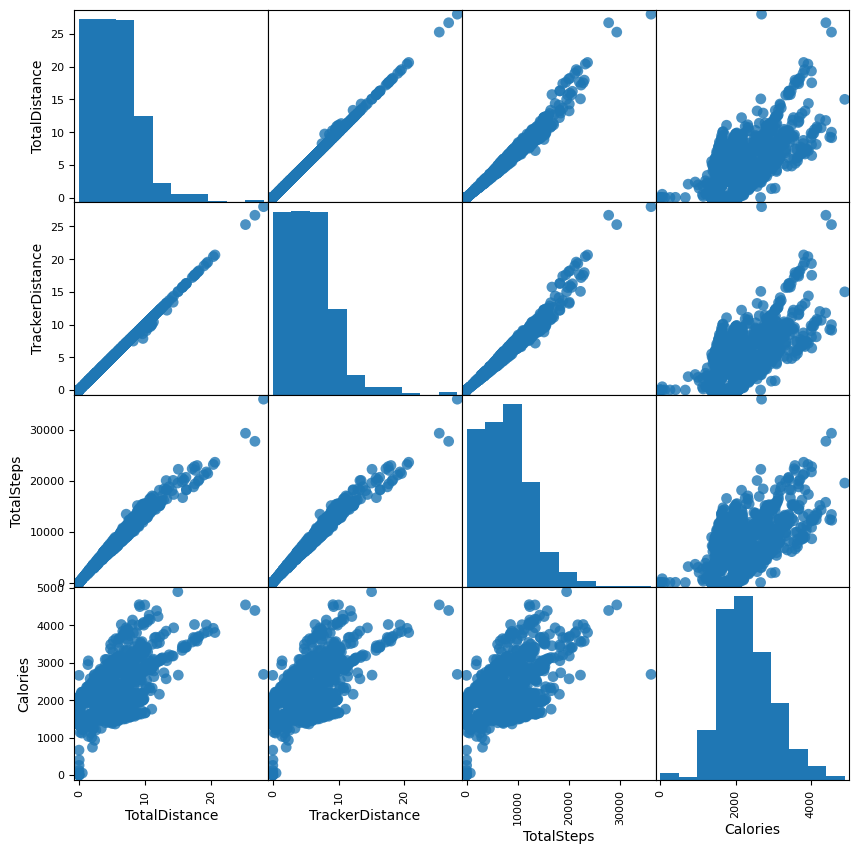

In [ ]:
pd.plotting.scatter_matrix(dailyActivity[['TotalDistance','TrackerDistance','TotalSteps', 'Calories']], figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

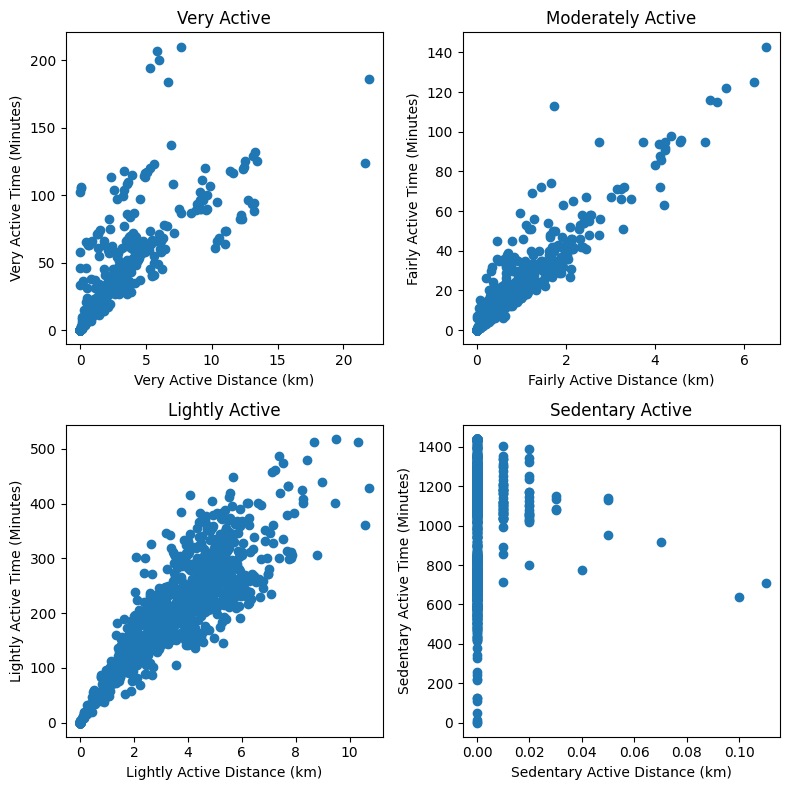

In [ ]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)
axes[0, 0].scatter(dailyActivity['VeryActiveDistance'],dailyActivity['VeryActiveMinutes'])
axes[0, 0].set_title('Very Active')
axes[0, 0].set_xlabel('Very Active Distance (km)')
axes[0, 0].set_ylabel('Very Active Time (Minutes)')

axes[0, 1].scatter(dailyActivity['ModeratelyActiveDistance'],dailyActivity['FairlyActiveMinutes'])
axes[0, 1].set_title('Moderately Active')
axes[0, 1].set_xlabel('Fairly Active Distance (km)')
axes[0, 1].set_ylabel('Fairly Active Time (Minutes)')

axes[1, 0].scatter(dailyActivity['LightActiveDistance'],dailyActivity['LightlyActiveMinutes'])
axes[1, 0].set_title('Lightly Active')
axes[1, 0].set_xlabel('Lightly Active Distance (km)')
axes[1, 0].set_ylabel('Lightly Active Time (Minutes)')

axes[1, 1].scatter(dailyActivity['SedentaryActiveDistance'],dailyActivity['SedentaryMinutes'])
axes[1, 1].set_title('Sedentary Active')
axes[1, 1].set_xlabel('Sedentary Active Distance (km)')
axes[1, 1].set_ylabel('Sedentary Active Time (Minutes)')
fig.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

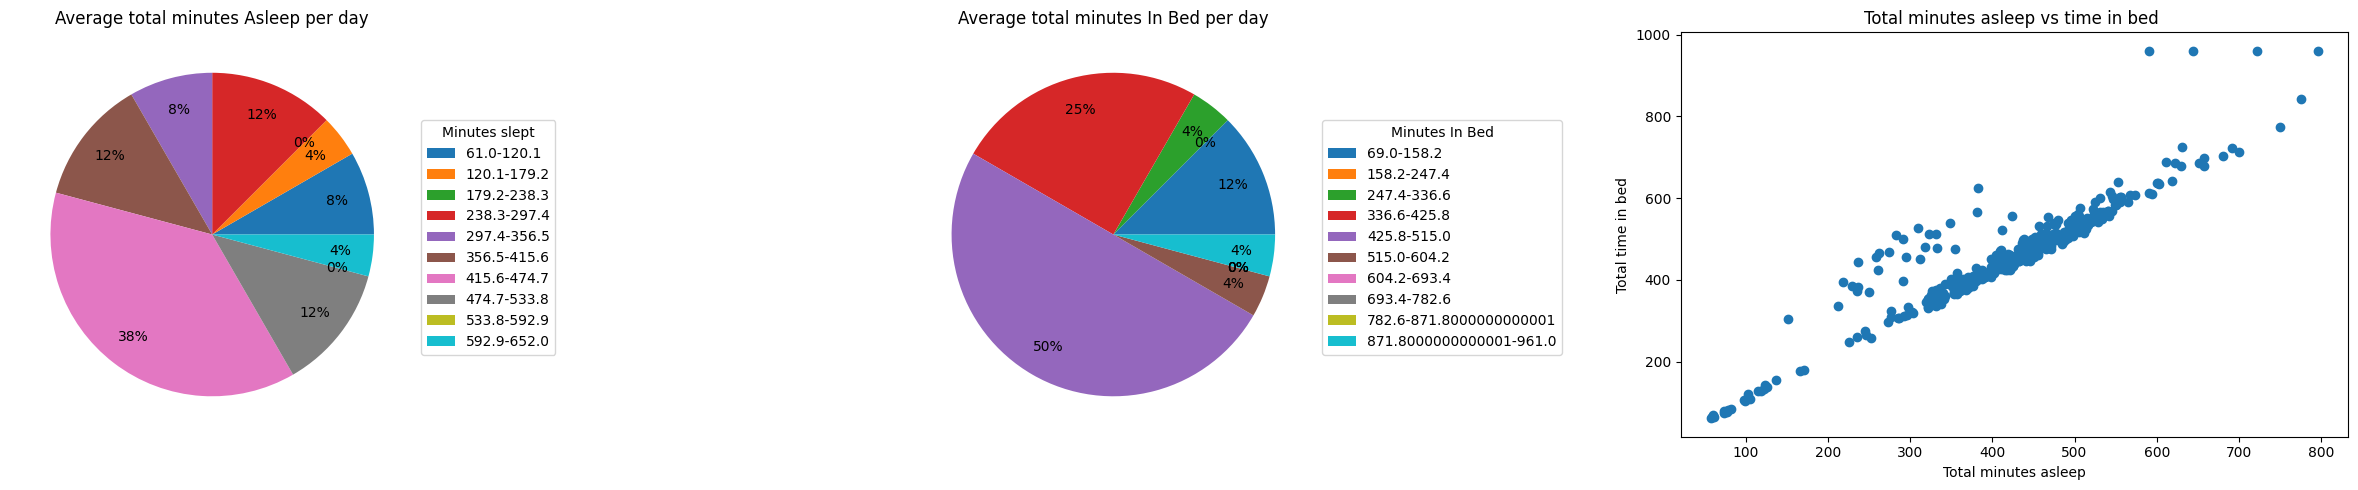

In [ ]:
minutesAsleepRecord = sleepDay[['Id','TotalMinutesAsleep']]
minutesAsleep_consolidated_mean = minutesAsleepRecord.groupby(by='Id',as_index=False)['TotalMinutesAsleep'].mean().round(3)
minutesAsleep_arr, minutesAsleep_bins = np.histogram(minutesAsleep_consolidated_mean['TotalMinutesAsleep'])
minutesAsleep_bins = [str(minutesAsleep_bins[i]) + "-" + str(minutesAsleep_bins[i+1]) for i in range(len(minutesAsleep_arr))]

minutesInBedRecord = sleepDay[['Id','TotalTimeInBed']]
minutesInBed_consolidated_mean = minutesInBedRecord.groupby(by='Id',as_index=False)['TotalTimeInBed'].mean().round(3)
minutesInBed_arr, minutesInBed_bins = np.histogram(minutesInBed_consolidated_mean['TotalTimeInBed'])
minutesInBed_bins = [str(minutesInBed_bins[i]) + "-" + str(minutesInBed_bins[i+1]) for i in range(len(minutesInBed_arr))]
plt.clf()

fig, axes = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(25)

axes[0].pie(minutesAsleep_arr,autopct='%1.0f%%',pctdistance=0.8)
axes[0].legend(minutesAsleep_bins, title="Minutes slept", bbox_to_anchor=(1,0.8))
axes[0].set_title('Average total minutes Asleep per day')


axes[1].pie(minutesInBed_arr,autopct='%1.0f%%',pctdistance=0.8)
axes[1].legend(minutesInBed_bins, title="Minutes In Bed", bbox_to_anchor=(1,0.8))
axes[1].set_title('Average total minutes In Bed per day')

axes[2].scatter(sleepDay['TotalMinutesAsleep'], sleepDay['TotalTimeInBed'])
axes[2].set_title('Total minutes asleep vs time in bed ')
axes[2].set_xlabel('Total minutes asleep')
axes[2].set_ylabel('Total time in bed')

fig.tight_layout()
plt.show()

<ipython-input-189-b50a9ece80a8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stepsAndCalories_consolidated_mean = stepsAndCalories.groupby(by='Id',as_index=False)['TotalSteps','Calories'].mean().round(3)


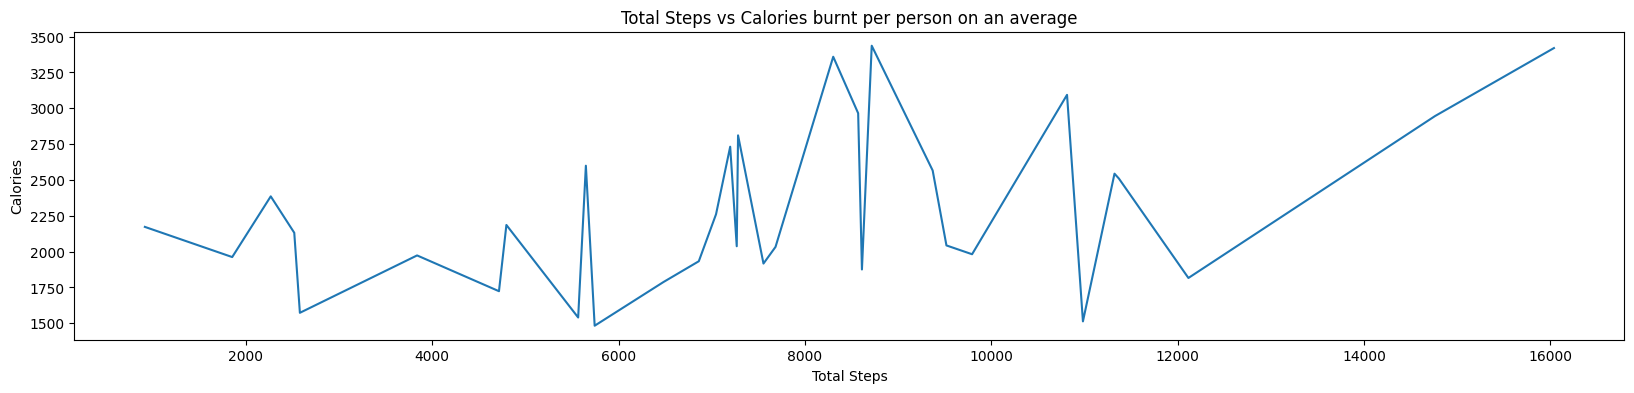

In [ ]:
stepsAndCalories = dailyActivity[['Id','TotalSteps','Calories']]
stepsAndCalories_consolidated_mean = stepsAndCalories.groupby(by='Id',as_index=False)['TotalSteps','Calories'].mean().round(3)

stepsAndCalories_totalSteps_sort = stepsAndCalories_consolidated_mean.sort_values(by=['TotalSteps'])
plt.figure(figsize=(20,4))
plt.plot(stepsAndCalories_totalSteps_sort['TotalSteps'], stepsAndCalories_totalSteps_sort['Calories'])
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.title('Total Steps vs Calories burnt per person on an average')
plt.show()

[3. 3. 2. 5. 7. 6. 4. 1. 0. 2.]
[  916.129   2428.5193  3940.9096  5453.2999  6965.6902  8478.0805
  9990.4708 11502.8611 13015.2514 14527.6417 16040.032 ]


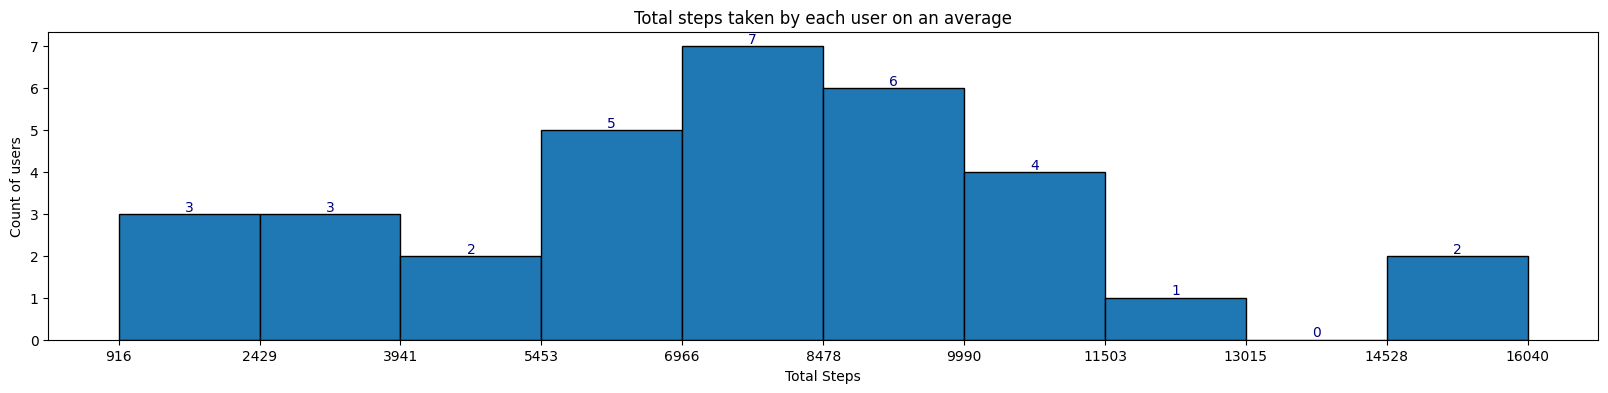

In [ ]:
plt.figure(figsize=(20,4))
values, bin, bars = plt.hist(stepsAndCalories_consolidated_mean['TotalSteps'], edgecolor='black')
print(values)
print(bin)
str_bin = [str(bin[i]) + "-" + str(bin[i+1]) for i in range(len(values))]
plt.xlabel('Total Steps')
plt.xticks(bin)
plt.ylabel('Count of users')
plt.bar_label(bars,color='navy')
plt.title('Total steps taken by each user on an average')
plt.show()

Observations:
1. Tracker Distance and Total Distance, which is actual distance, are linearly correlated, that signifies that tracked distance is accurate.
2. Count of steps and distance travelled are linearly correlated.
3. Most of the users have covered at most 20 km distance or approximately 25000 steps.
4. Most users had at max 150 minutes duration of high activity, which lasted till 15 km.
5. Most users had high duration of sedentary activity.
6. Most of the users had a healthy sleep and users had devices while they were in bed, either asleep or awake.
7. Most users had total steps in between 5453 and 9990, and they show high calories lost with few exceptions, which defines some users have defective devices.

#### Actions
Following actions can be taken by the company:
1. Activity trackers need to be quite accurate as per the market standards.
2. Users user the devices in tough situations, so need to build the devices robust enough to handle such activities.
3. Devices must have features to track their sleep cycles.
4. Company can standout from rest of their competition by developing accurate check for calories with respect to total steps.